In [1]:
%%javascript
Jupyter.notebook.config.update({
  'load_extensions': { 'vim_binding/vim_binding': true },
});

<IPython.core.display.Javascript object>

In [9]:
import numpy
import scipy.special
import matplotlib.pyplot as plt
%matplotlib inline

# scale function to make sure we have a range from 0.01 to 0.99
# sigmoid goes from > 0 to < 1
scale = lambda i: (numpy.asfarray(i) / 255.0 * 0.99) + 0.01

# Define Neural Network

The weights inside the neural network carry state


## Sigmoid function

\begin{equation*}
y = \frac{1}{1 + e^{-x}}
\end{equation*}

## Weight update

\begin{equation*}
\Delta W_{jk} = \alpha \cdot E_k \cdot O_k(1 - O_k) \cdot O_j^T
\end{equation*}

\begin{equation*}
\frac{\partial E}{\partial w_{jk}} = -(t_k - o_k) \cdot sigmoid(\sum_j w_{jk} \cdot o_j)(1 - sigmoid(\sum_{j} w_{jk} \cdot o_j)) \cdot o_j
\end{equation*}

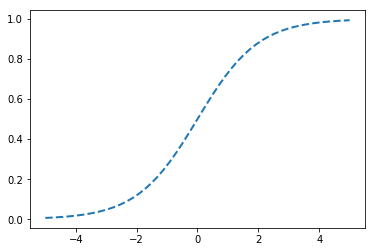

In [3]:
x = numpy.linspace(-5, 5)
line = plt.plot(x, scipy.special.expit(x), '--', linewidth=2)

In [97]:
def create_random_weights(n_from, n_to):
    return numpy.random.normal(
        0.0,
        pow(n_from, -0.5),
        (n_to, n_from),
    )

def init_network(n_input_nodes, n_hidden_nodes, n_output_nodes):
    weights_input_hidden = create_random_weights(
        n_from=n_input_nodes,
        n_to=n_hidden_nodes)
    weights_hidden_output = create_random_weights(
        n_from=n_hidden_nodes,
        n_to=n_output_nodes)
    return (weights_input_hidden, weights_hidden_output)

def train_network(input_values, target_values, weights, learning_rate = 0.1):
    activation = scipy.special.expit 
    
    inputs = numpy.array(input_values, ndmin=2).T
    targets = numpy.array(target_values, ndmin=2).T

    (weights_input_hidden, weights_hidden_output) = weights
    
    hidden_inputs = numpy.dot(weights_input_hidden, inputs)
    hidden_outputs = activation(hidden_inputs);

    final_inputs = numpy.dot(weights_hidden_output, hidden_outputs)
    final_outputs = activation(final_inputs)

    output_errors = targets - final_outputs
    hidden_errors = numpy.dot(weights_hidden_output.T, output_errors)
    weights_hidden_output += learning_rate * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), 
                                    numpy.transpose(hidden_outputs))
    weights_input_hidden += learning_rate * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)),
                                   numpy.transpose(inputs))
    
    
    input_vector = numpy.array(input_values, ndmin=2).T
    target_vector = numpy.array(target_values, ndmin=2).T
   
    pass

def query_network(weights, input_values):
    activation = scipy.special.expit
    input_vector = numpy.array(input_values, ndmin=2).T

    (weights_input_hidden, weights_hidden_output) = weights
    
    hidden_inputs = numpy.dot(weights_input_hidden, input_vector)
    hidden_results = activation(hidden_inputs)

    output_inputs = numpy.dot(weights_hidden_output, hidden_results)
    output_results = activation(output_inputs)

    return output_results
    
weights = init_network(
    n_input_nodes=28 * 28,
    n_hidden_nodes=100,
    n_output_nodes=10)


In [230]:
class NeuralNetwork:
    def __init__(self, n_inputnodes, n_hiddennodes, n_outputnodes, learning_rate):
        self.learning_rate = learning_rate
       
        #self.wih = self._init_rnd_weights(n_inputnodes, n_hiddennodes)
        #self.who = self._init_rnd_weights(n_hiddennodes, n_outputnodes)
        n_mgnsnodes = 100
        self.wim = self._init_rnd_weights(n_inputnodes, n_mgnsnodes)
        self.wmh = self._init_rnd_weights(n_mgnsnodes, n_hiddennodes)
        self.who = self._init_rnd_weights(n_hiddennodes, n_outputnodes)

        self.activation_function = scipy.special.expit
        self.inverse_activation_function = scipy.special.logit
        
    def _init_rnd_weights(self, n_layer_1, n_layer_2):
        weights = numpy.random.normal(0.0, pow(n_layer_1, -0.5), (n_layer_2, n_layer_1)) 
        
        return weights
        
    def _calc_layer(self, weights, inputs):
        weighted_inputs = numpy.dot(weights, inputs)
        outputs = self.activation_function(weighted_inputs)
        
        return outputs

    def _backpropagation(self, errors, outputs, inputs):
        error_delta = self.learning_rate * numpy.dot(
            (errors * outputs * (1.0 - outputs)), 
            inputs.T)
        
        return error_delta
        
    def train(self, inputs_list, targets_list):
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
      
        #hidden_outputs = self._calc_layer(self.wih, inputs)
        #final_outputs = self._calc_layer(self.who, hidden_outputs)
        mgns_outputs = self._calc_layer(self.wim, inputs)
        hidden_outputs = self._calc_layer(self.wmh, mgns_outputs)
        final_outputs = self._calc_layer(self.who, hidden_outputs)
        
        output_errors = targets - final_outputs
        hidden_errors = numpy.dot(self.who.T, output_errors)
        mgns_errors = numpy.dot(self.wmh.T, hidden_errors)
        
        #self.who += self._backpropagation(output_errors, final_outputs, hidden_outputs)
        #self.wih += self._backpropagation(hidden_errors, hidden_outputs, inputs)
        self.who += self._backpropagation(output_errors, final_outputs, hidden_outputs)
        self.wmh += self._backpropagation(hidden_errors, hidden_outputs, mgns_outputs)
        self.wim += self._backpropagation(mgns_errors, mgns_outputs, inputs)
        
        pass
   
    def query(self, inputs_list):
        # convert flat intput into 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
       
        mgns_outputs = self._calc_layer(self.wim, inputs)
        hidden_outputs = self._calc_layer(self.wmh, mgns_outputs)
        #hidden_outputs = self._calc_layer(self.wih, inputs)
        final_outputs = self._calc_layer(self.who, hidden_outputs)
        
        return final_outputs
    
    def backquery(self, targets_list):
        # transpose the targets list to a vertical array
        final_outputs = numpy.array(targets_list, ndmin=2).T
        
        # calculate the signal into the final output layer
        final_inputs = self.inverse_activation_function(final_outputs)

        # calculate the signal out of the hidden layer
        hidden_outputs = numpy.dot(self.who.T, final_inputs)
        # scale them back to 0.01 to .99
        hidden_outputs -= numpy.min(hidden_outputs)
        
        hidden_outputs /= numpy.max(hidden_outputs)
        hidden_outputs *= 0.98
        hidden_outputs += 0.01
        
        # calculate the signal into the hideen layer
        hidden_inputs = self.inverse_activation_function(hidden_outputs)
        
        # calculate the signal out of the input layer
        inputs = numpy.dot(self.wih.T, hidden_inputs)
        # scale them back to 0.01 to .99
        inputs -= numpy.min(inputs)
        inputs /= numpy.max(inputs)
        inputs *= 0.98
        inputs += 0.01
        
        return inputs

# Initialize

Using a specified number of input, hidden and output nodes and a learning_rate.

In [233]:
no_of_output_nodes = 10
no_of_input_nodes = 28 * 28
no_of_hidden_nodes = 100
learning_rate = 0.15
nn = NeuralNetwork(no_of_input_nodes, no_of_hidden_nodes, no_of_output_nodes, learning_rate)

# MNIST

## Train

### Load small training data

In [208]:
small_training_data_file = open("mnist_train_100.csv", 'r')
#small_training_data_file = open("zalando/mnist_train_100.csv", 'r')
small_training_data_lines = small_training_data_file.readlines()
small_training_data_file.close()

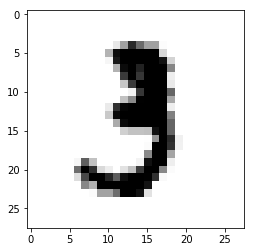

In [186]:
some_entry = small_training_data_lines[10]
fields = some_entry.split(',')
first, rest = fields[0], fields[1:]
test_value = first
image_array = numpy.asfarray(rest).reshape((28, 28))
#matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')
plt.imshow(image_array, cmap='Greys', interpolation='None')

## Training helper function

In [202]:
def train(network, epochs, data_list):
    for e in range(epochs): 
        for record in data_list:
            fields = record.split(',')
            first, rest = fields[0], fields[1:]
            inputs = scale(rest)
            targets = numpy.zeros(no_of_output_nodes) + 0.01
            targets[int(first)] = 0.99
            #train_network(inputs, targets, weights)
            network.train(inputs, targets)
            pass
        pass

### Training with small data

In [218]:
train(network=nn, epochs=5, data_list=small_training_data_lines)

## Test with small data

In [210]:
test_data_file = open("mnist_test_10.csv", 'r')
#test_data_file = open("zalando/mnist_test_10.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

## Pick the 4th number

In [190]:
some_entry = test_data_list[3]
fields = some_entry.split(',')
first, rest = fields[0], fields[1:]
test_value = first

### Render it

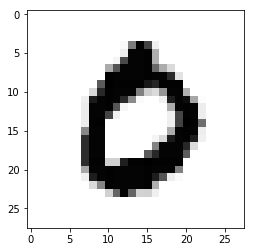

In [191]:
image_array = numpy.asfarray(rest).reshape((28, 28))
plt.imshow(image_array, cmap='Greys', interpolation='None')

In [219]:
scaled_input = scale(rest)
outputs = nn.query(scaled_input)
#outputs = query_network(weights, scaled_input)
output_value = numpy.argmax(outputs)
certainty = outputs[output_value][0]
print "test value {} is {} with {:f} certainty".format(test_value, output_value, certainty)

test value 0 is 0 with 0.640254 certainty


In [212]:
def is_match(network, record):
    fields = record.split(',')
    first, rest = fields[0], fields[1:]
    correct_number = int(first)
    scaled_input = scale(rest) 
    outputs = nn.query(scaled_input)
    #outputs = query_network(weights, scaled_input)
    result = numpy.argmax(outputs)
    return 1 if result == correct_number else 0
   
scores = [is_match(nn, r) for r in test_data_list]

In [213]:
print "accuracy = {}".format(float(numpy.asarray(scores).sum()) / len(scores))

accuracy = 0.6


# Try with different learning rate

In [195]:
#learning_rate = 0.22
learning_rate = 0.2
no_of_hidden_nodes = 200
nn2 = NeuralNetwork(no_of_input_nodes, no_of_hidden_nodes, no_of_output_nodes, learning_rate)

train(network=nn2, epochs=10, data_list=small_training_data_lines)

scores = [is_match(nn2, r) for r in test_data_list]
"accuracy = {:f}".format(float(numpy.asarray(scores).sum()) / len(scores))

'accuracy = 0.500000'

# Use serious training data

In [234]:
#serious_training_data_file = open("mnist_train.csv", 'r')
serious_training_data_file = open("zalando/mnist_train.csv", 'r')
serious_training_data_lines = serious_training_data_file.readlines()
serious_training_data_file.close()

#train(network=nn2, epochs=10, data_list=serious_training_data_lines)
train(network=nn, epochs=5, data_list=serious_training_data_lines)

## With small test sample

In [216]:
#scores = [is_match(nn2, r) for r in test_data_list]
scores = [is_match(nn, r) for r in test_data_list]
"accuracy = {:f}".format(float(numpy.asarray(scores).sum()) / len(scores))

'accuracy = 0.600000'

## With serious test sample

In [235]:
serious_test_data_file = open("zalando/mnist_test.csv", 'r')
#serious_test_data_file = open("mnist_test.csv", 'r')
serious_test_data_lines = serious_test_data_file.readlines()
serious_test_data_file.close()

#scores = [is_match(nn2, r) for r in serious_test_data_lines]
scores = [is_match(nn, r) for r in serious_test_data_lines]
"accuracy = {:f}".format(float(numpy.asarray(scores).sum()) / len(scores))

'accuracy = 0.650100'

[ 0.01  0.01  0.01  0.99  0.01  0.01  0.01  0.01  0.01  0.01]


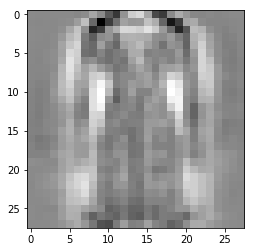

In [58]:
# label to test
label = 3
# create the output signals for this label
targets = numpy.zeros(no_of_output_nodes) + 0.01
# all_values[0] is the target label for this record
targets[label] = 0.99
print(targets)

# get image data
image_data = nn2.backquery(targets)

# plot image data
plt.imshow(image_data.reshape(28,28), cmap='Greys', interpolation='None')